# 1. Data transform and EDA
---

## Project Introduction


Located in the province of Alberta, Calgary is the sunniest city in the country in all respects. It receives 2396 hours of bright sunshine on an average every year and experiences about 333 sunny days annually. 52% of the daylight hours in the city are sunny[1]. This makes Calgary a big potential for the solar market.
The goal of my project is to create a data-based solar energy and power predictor/estimator specifically for Calgary, AB area by a given time and weather. The current data we can obtain is based on a system called TMY. TMY is Typical Meteorological Year data (TMY). To determine TMY data, various meteorological measurements are made at hourly intervals over several years to build up a picture of the local climate. A simple average of the yearly data underestimates the amount of variability, so the month that is most representative of the location is selected[2]. However, with the climate change we are experiencing these years, I found it hard to determine what would typical would be.

Potential and current residential solar energy consumers could benefit from this project by gaining more unbiased information about what they are expecting by installing the solar panels. Solar providers can potentially benefit from this too as having a data-driven estimation for the long-term energy output could potentially be a more persuasive tool to attract future customers. 


The data is from National Solar Radiation Database. https://maps.nrel.gov/nsrdb-viewer/?aL=x8CI3i%255Bv%255D%3Dt%26Jea8x6%255Bv%255D%3Dt%26Jea8x6%255Bd%255D%3D1%26VRLt_G%255Bv%255D%3Dt%26VRLt_G%255Bd%255D%3D2%26mcQtmw%255Bv%255D%3Dt%26mcQtmw%255Bd%255D%3D3&bL=clight&cE=0&lR=0&mC=4.740675384778373%2C22.8515625&zL=2. Many research papers have been published based on the data provided by them.  



## Notebook Introduction

I got the data from 1998-2002, they are all csv files, 1 file per year. They were combined into one file by using the command line. In this notebook, we will be loading our combined data, exploring the data, and possibly doing some feature transformations, new data sets will be possibly generated based on the current one for modeling. Note, that there is no leap day data in this dataset.

### Contents
[Data Transformation](#Data-Transformation)

[EDA](#EDA)
- [Visualization](#Visualization)
- [Statistical Analysis](#Statistical-Analysis)

[Conclusion](#Conclusion)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import datetime

In [2]:
df = pd.read_csv('combine.csv')
df.head()

Year  Month  Day  Hour  Minute  DHI  DNI  GHI  Clearsky DHI  Clearsky DNI  \
0  1998      1    1     0       0    0    0    0             0             0   
1  1998      1    1     0      30    0    0    0             0             0   
2  1998      1    1     1       0    0    0    0             0             0   
3  1998      1    1     1      30    0    0    0             0             0   
4  1998      1    1     2       0    0    0    0             0             0   

   Clearsky GHI  Cloud Type  Dew Point  Solar Zenith Angle  Surface Albedo  \
0             0           4       -6.0              150.94           0.157   
1             0           8       -6.0              151.93           0.157   
2             0           7       -6.0              151.73           0.157   
3             0           7       -6.0              150.36           0.157   
4             0           7       -7.0              147.99           0.157   

   Wind Speed  Relative Humidity  Temperature  Pressure  
0         0.6              85.25         -3.0       870  
1         0.6              85.27         -3.0       870  
2         0.7              87.96         -4.0       870  
3         0.7              87.98         -4.0       870  
4         0.8              89.34         -5.0       870

The data set loaded in properly, let's take a look what kind of data is stored in each column:

| Feature name     | Description | Data accessibility 
| ----------- | ----------- |-------------|
| Year       | Year the data is recorded   | Easy to access, could be directly embedded in the app
| Month  | Month the data is recorded      | Easy to access, could be directly embedded in-app
| Day  | Day the data is recorded      | Easy to access, could be directly embedded in-app
| Hour  | Hour the data is recorded      | Easy to access, could be directly embedded in-app
| Minute  | Minute the data is recorded      | Easy to access, could be directly embedded in the app
| DHI  | Diffused Normal Irradiance - the amount of light that is coming perpendicular to the surface, w/m^2  | Not easy to access
| DNI  | Diffused Horizontal Irradiance - solar radiation that does has been scattered by clouds and particles in the atmosphere and comes equally from all directions, w/m^2      | Not easy to access
| GHI  | Global Horizontal Irradiance -  total amount of shortwave radiation received from above by a horizontal surface (parallel) to the ground, w/m^2      | Not easy to access, target
| Clearsky DHI  | Calculated value     | Not easy to access
| Clearsky DNI  | Calculated value      | Not easy to access
| Clearsky GHI  | Calculated value     | Not easy to access
| Cloud Type  | Different types of cloud, categorical data     | Easy to access
| Dew Point  | The temperature the air needs to be cooled to (at constant pressure) to achieve a relative humidity (RH) of 100%, degree C        | Easy to access by using free weather API, could be directly embedded in the app
| Solar Zenith Angle  | The angle between the sun's rays and the vertical direction | Found a python library called pysolar that could calculate the solar zenith angle by using the latitude, longitude of the location, and time, we can hard code this feature in the app.
| Surface Albedo | Is defined as the ratio of radiosity Je to the irradiance Ee (flux per unit area) received by a surface, ranging from 0 to 1.      | Hard to asses, did not find any API that I can request to get the data
| Wind Speed | Wind speed when the data was recorded, m/s      | Easy to access by using free weather API,  could be directly embedded in the app
| Relative Humidity | Ratio of how much water vapor is in the air and how much water vapor the air could potentially contain at a given temperature.       | Easy to access by using free weather API, could be directly embedded in the app
| Temperature |  Temperature when the data was recorded, degree C    | Easy to access by using free weather API, could be directly embedded in-app
| Pressure | Station pressure, millibars     | Sea level pressure is easy to access by using free weather API, it will need to be converted to station pressure


Note here: our target GHI currently has a power unit w/$m^2$, if we want to do a longer-term energy output estimation, we will have to take the time into account and change it to an energy unit. The energy output estimation could potentially be a time series analysis.

There are 12 different types of could in this data set, these are 

| Cloud type number    | Description |  
| ----------- | ----------- |
| 0| Clear  | 
| 1| Probably Clear  | 
| 2| Fog  | 
| 3| Water  | 
| 4| Super-Cooled Water  | 
| 5| Mixed | 
| 6| Opaque Ice  | 
| 7| Cirrus  | 
| 8| Overlapping  | 
| 9| Overshooting  | 
| 10| Unknown | 
| 11| Dust  | 
| 12| Smoke  | 

I was unable to find a direct weather API that has this kind of cloud information, therefore, users will have to input it themselves in the app.

These are the information the data set is providing us.  This dataset is supposed to be a clean dataset.



First, let's transform the cloud type data to what it actually means.

## Data Transformation

In [3]:
df['Cloud Type_tr'] = df['Cloud Type'].map({0: 'Clear',
                                            1: 'Probably Clear',
                                            2: 'Fog',
                                            3: 'Water',
                                            4: 'Super-Cooled Water',
                                            5: 'Mixed',
                                            6: 'Opaque Ice',
                                            7: 'Cirrus',
                                            8: 'Overlapping',
                                            9: 'Overshooting',
                                            10: 'Unknown',
                                            11: 'Dust',
                                            12: 'Smoke'})

In [4]:
df['Cloud Type'].value_counts(normalize=True), df['Cloud Type_tr'].value_counts(normalize=True)

(7     0.224797
 0     0.222029
 4     0.171173
 8     0.119101
 1     0.113902
 6     0.107194
 3     0.029601
 9     0.008797
 2     0.002814
 10    0.000591
 Name: Cloud Type, dtype: float64,
 Cirrus                0.224797
 Clear                 0.222029
 Super-Cooled Water    0.171173
 Overlapping           0.119101
 Probably Clear        0.113902
 Opaque Ice            0.107194
 Water                 0.029601
 Overshooting          0.008797
 Fog                   0.002814
 Unknown               0.000591
 Name: Cloud Type_tr, dtype: float64)

We got all the matching numbers, we can go ahead to drop the original cloud type feature.

In [5]:
df = df.drop('Cloud Type', axis=1)

In [6]:
df.shape, df.duplicated().sum(), df.isna().sum().sum()

((402960, 19), 0, 0)

This dataset contains 401,960 rows, 20 columns, no duplicated rows and no missing data.

In [7]:
23*365*48 # check is this number matches total rows of this dataset

402960

we are getting 48 data points, 365 days per year for 23 years. The total number of rows of the data sets matched the supposed number of data points.

In [8]:
df.describe()

Year          Month            Day           Hour  \
count  402960.000000  402960.000000  402960.000000  402960.000000   
mean     2009.000000       6.526027      15.720548      11.500000   
std         6.633258       3.447856       8.796258       6.922195   
min      1998.000000       1.000000       1.000000       0.000000   
25%      2003.000000       4.000000       8.000000       5.750000   
50%      2009.000000       7.000000      16.000000      11.500000   
75%      2015.000000      10.000000      23.000000      17.250000   
max      2020.000000      12.000000      31.000000      23.000000   

              Minute            DHI            DNI            GHI  \
count  402960.000000  402960.000000  402960.000000  402960.000000   
mean       15.000000      55.870205     192.324124     149.214580   
std        15.000019      87.412777     307.841803     231.128941   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%        15.000000       0.000000       0.000000       0.000000   
75%        30.000000      82.000000     337.000000     235.000000   
max        30.000000     480.000000    1029.000000     968.000000   

        Clearsky DHI   Clearsky DNI   Clearsky GHI      Dew Point  \
count  402960.000000  402960.000000  402960.000000  402960.000000   
mean       39.048489     345.683115     205.025161      -1.858055   
std        49.261347     382.131934     279.165311       8.533689   
min         0.000000       0.000000       0.000000     -38.000000   
25%         0.000000       0.000000       0.000000      -7.000000   
50%         0.000000       0.000000       0.000000      -1.000000   
75%        74.000000     767.000000     373.000000       5.000000   
max       480.000000    1029.000000     968.000000      19.400000   

       Solar Zenith Angle  Surface Albedo     Wind Speed  Relative Humidity  \
count       402960.000000   402960.000000  402960.000000      402960.000000   
mean            89.656833        0.398601       1.318705          70.284536   
std             30.463556        0.338063       0.752389          19.263895   
min             27.600000        0.127000       0.000000          10.850000   
25%             67.230000        0.146000       0.800000          57.710000   
50%             89.740000        0.159000       1.100000          73.660000   
75%            111.950000        0.866000       1.700000          84.660000   
max            152.420000        0.870000       6.800000         100.000000   

         Temperature       Pressure  
count  402960.000000  402960.000000  
mean        4.394569     880.833182  
std        10.494923       7.425685  
min       -33.000000     850.000000  
25%        -2.000000     880.000000  
50%         3.900000     880.000000  
75%        12.000000     889.000000  
max        35.900000     903.000000

First, it will make more sense to combine the hour and minute columns to represent the time of the day, therefore, we will keep 0 minutes as 0 and change 30 minutes to 0.5 hours and add it with the hour to generate a time column.

In [9]:
df['Minute'] = np.where(df['Minute']==0, 0, 0.5)
df['time'] = df['Hour'] + df['Minute']


In our current data set, all the information related to 'date' is in separates columns. It will make sense to combine the year, month, and date column into a datetime type column as we are looking into time series modeling probabilities for energy output estimation.

In [10]:
df['date'] = df['Year'].map(str) + '-' + df['Month'].map(str) + '-' + df['Day'].map(str)
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.tail()

Year  Month  Day  Hour  Minute  DHI  DNI  GHI  Clearsky DHI  \
402955  2008     12   31    21     0.5    0    0    0             0   
402956  2008     12   31    22     0.0    0    0    0             0   
402957  2008     12   31    22     0.5    0    0    0             0   
402958  2008     12   31    23     0.0    0    0    0             0   
402959  2008     12   31    23     0.5    0    0    0             0   

        Clearsky DNI  ...  Dew Point  Solar Zenith Angle  Surface Albedo  \
402955             0  ...      -19.0              134.10           0.866   
402956             0  ...      -19.0              138.43           0.866   
402957             0  ...      -19.0              142.46           0.866   
402958             0  ...      -19.0              146.02           0.866   
402959             0  ...      -19.0              148.93           0.866   

        Wind Speed  Relative Humidity  Temperature  Pressure   Cloud Type_tr  \
402955         1.8              73.74        -15.0       890  Probably Clear   
402956         1.9              73.84        -15.0       890  Probably Clear   
402957         1.9              73.84        -15.0       890  Probably Clear   
402958         2.0              74.32        -15.0       890  Probably Clear   
402959         2.0              68.41        -15.0       890  Probably Clear   

        time       date  
402955  21.5 2008-12-31  
402956  22.0 2008-12-31  
402957  22.5 2008-12-31  
402958  23.0 2008-12-31  
402959  23.5 2008-12-31  

[5 rows x 21 columns]

Because we want to predict the energy output, we will have to incorporate the time to the power data (GHI). To do that, we will use np.trapz which will calculate the area under a curve in the plot.

In [12]:
def integration (data):    
    result = np.trapz(y=data.values, x=data.index/2)
    return result

In [13]:
df_radiation = df['GHI'].groupby(df['date'].dt.date).apply(integration).reset_index()
df_radiation['date'] = pd.to_datetime(df_radiation['date'])
df_radiation.head()

date    GHI
0 1998-01-01  552.0
1 1998-01-02  126.5
2 1998-01-03  442.5
3 1998-01-04  371.5
4 1998-01-05  543.5

In [14]:
df_radiation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8395 entries, 0 to 8394
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    8395 non-null   datetime64[ns]
 1   GHI     8395 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 131.3 KB


## EDA

### Visualization

I want to explore the energy data first to determine if it is a good candidate for time series analysis first.

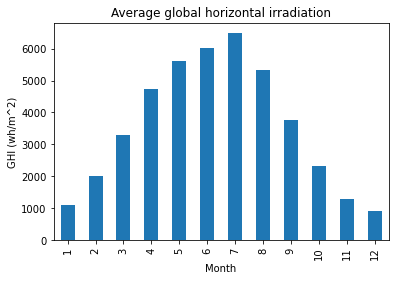

In [15]:
df_radiation.groupby(df_radiation['date'].dt.month)['GHI'].mean().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('GHI (wh/m^2)')
plt.title('Average global horizontal irradiation')
plt.show()

The bar plot above shows us the monthly average solar irradiation received in Calgary. We can see the trend going up from January to July after it peaks in July, the amount of irradiation started to decline till December. This is what we are expecting, as the days are longer during the warmer months and the nights are longer during the colder month.

In [16]:
df_radiation.describe().T

count         mean          std    min     25%     50%     75%     max
GHI  8395.0  3581.149911  2358.676395  105.5  1432.5  3174.0  5494.0  9135.5

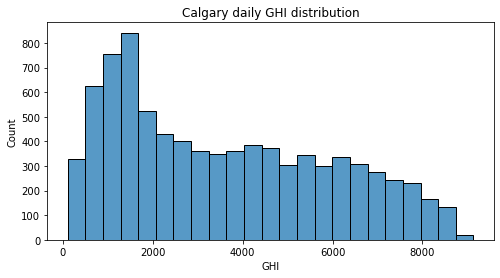

In [17]:
plt.figure(figsize=(8, 4))
sns.histplot(x='GHI', data = df_radiation).set_title('Calgary daily GHI distribution')
plt.show()

We see a right-skewed distribution of the daily GHI in Calgary. Considering Calgary's geographical location (in the north), This distribution does make sense as the winter (less sunlight) there is noticeably longer than summer (more sunlight).

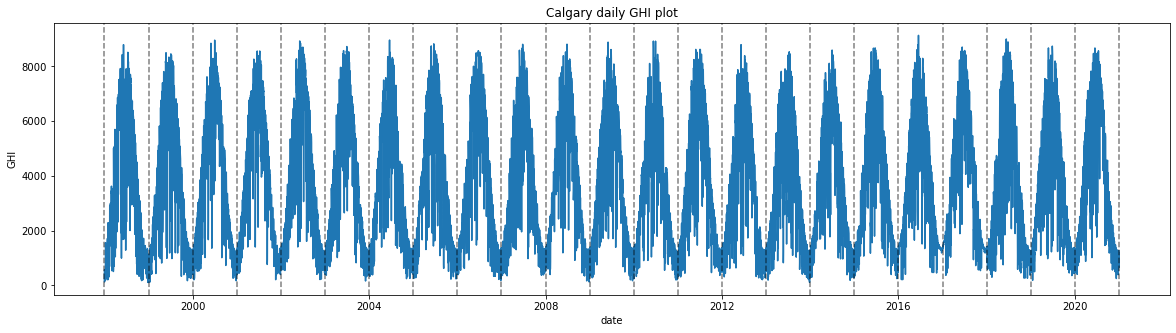

In [18]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='date', y='GHI', data=df_radiation).set_title('Calgary daily GHI plot')
for year in range (1998, 2022):
    plt.axvline(datetime.datetime(year, 1, 1), color='k', linestyle='--', alpha=0.5)

From the plot above, which shows the changes in the daily GHI over time, we see strong seasonality year over year, this makes it a perfect candidate for time series analysis. We will save this dataframe to a separate CSV file for time series analysis for energy prediction.

In [19]:
df_radiation.to_csv('daily_energy_table.csv')

Now we can do some EDA's on the power prediction table. First, we will take a look at the distribution of the target, the 'GHI' column.

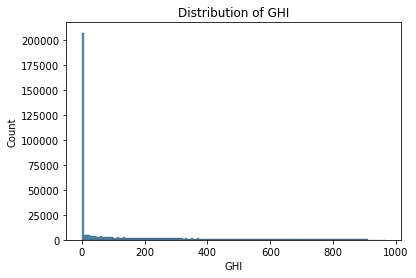

In [20]:
sns.histplot(x='GHI', data=df).set_title('Distribution of GHI')
plt.show()

We can see GHI=0 is overpowering all the other values of GHI, which is not hard to understand as when we will not get any solar irradiance while the sun is not out. With having longer dark hours than bright hours yearly, we will see a distribution like this.

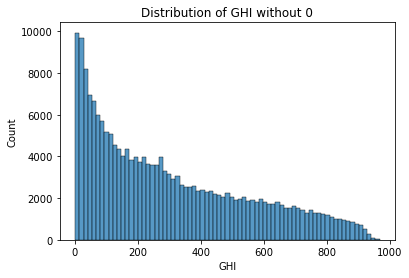

In [21]:
sns.histplot(x='GHI', data=df[df['GHI'] !=0]).set_title('Distribution of GHI without 0')
plt.show()

As expected, we see a right-skewed distribution of GHI when there is sunlight, I would not say there are any extreme outliers in this distribution. Next. we will be creating a dataset with all the features that could be easily accessed by us, as they are a potential predictor for our target, we will drop the hour and minute columns since we got the time column.

In [22]:
df.head()

Year  Month  Day  Hour  Minute  DHI  DNI  GHI  Clearsky DHI  Clearsky DNI  \
0  1998      1    1     0     0.0    0    0    0             0             0   
1  1998      1    1     0     0.5    0    0    0             0             0   
2  1998      1    1     1     0.0    0    0    0             0             0   
3  1998      1    1     1     0.5    0    0    0             0             0   
4  1998      1    1     2     0.0    0    0    0             0             0   

   ...  Dew Point  Solar Zenith Angle  Surface Albedo  Wind Speed  \
0  ...       -6.0              150.94           0.157         0.6   
1  ...       -6.0              151.93           0.157         0.6   
2  ...       -6.0              151.73           0.157         0.7   
3  ...       -6.0              150.36           0.157         0.7   
4  ...       -7.0              147.99           0.157         0.8   

   Relative Humidity  Temperature  Pressure       Cloud Type_tr time  \
0              85.25         -3.0       870  Super-Cooled Water  0.0   
1              85.27         -3.0       870         Overlapping  0.5   
2              87.96         -4.0       870              Cirrus  1.0   
3              87.98         -4.0       870              Cirrus  1.5   
4              89.34         -5.0       870              Cirrus  2.0   

        date  
0 1998-01-01  
1 1998-01-01  
2 1998-01-01  
3 1998-01-01  
4 1998-01-01  

[5 rows x 21 columns]

In [23]:
df_predictor = df.drop(['DNI', 'DHI','Clearsky DHI', 'Surface Albedo', 'Clearsky DNI', 'Clearsky GHI', 'date', 'Hour', 'Minute'], axis=1)

Let's take a look at the distribution of all the potential predictors for 'GHI'.

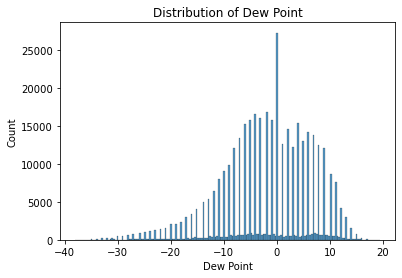

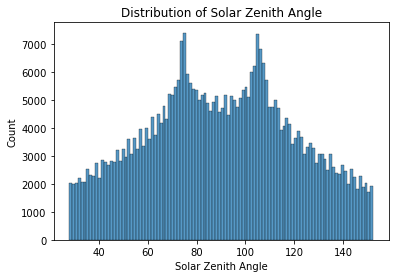

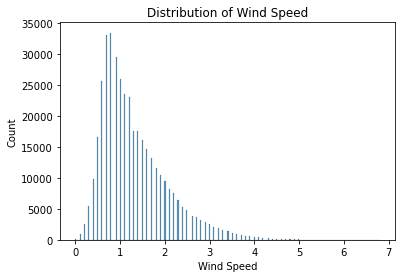

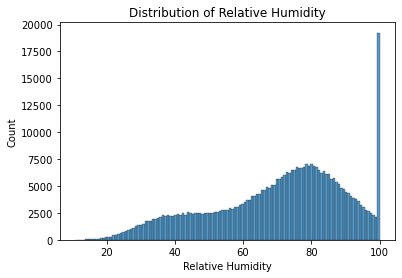

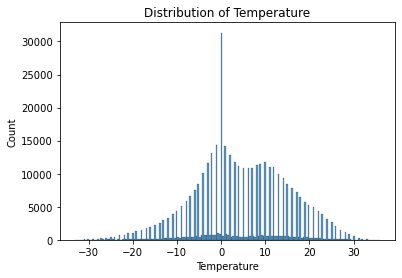

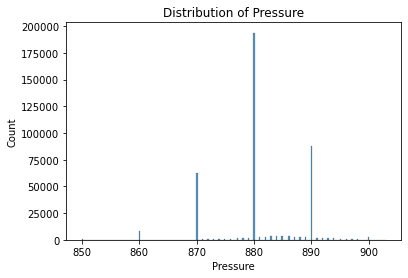

In [24]:
for col in df_predictor.drop(['GHI', 'Year', 'Month', 'time', 'Day', 'Cloud Type_tr'],  axis=1).columns:
    sns.histplot(x=col, data=df_predictor)
    
    plt.title(f'Distribution of {col}')
    plt.show()

- We see more zeros in 'Dew Point', and 'Temperature' data, we see more 100s in 'Relative Humidity data. 

- We see 2 peaks for the solar zenith angle, which is caused by the sun 'travels' back and forth each year. 

- None of the features is normally distributed, while none of them is having any extreme outliers. 

- One thing to note here, for 'Dew Point' and 'Temperature' data, we got most of the data with whole numbers and a few of them with decimals, for 'Pressure' data, we got most of the data with a number that is the times of 10 with a smaller amount of data in between. 

Since the data we collected is over 23 years, this could be caused by the different ways how the data was collected over the years, we will check out our assumptions first.

In [25]:
df_predictor[df_predictor['Pressure']%10 !=0 ]['Year'].value_counts()

2019    15793
2020    15786
2018    15767
Name: Year, dtype: int64

In [26]:
df_predictor[df_predictor['Temperature']%1 !=0 ]['Year'].value_counts()

2018    15813
2020    15785
2019    15757
Name: Year, dtype: int64

In [27]:
df_predictor[df_predictor['Dew Point']%1 !=0 ]['Year'].value_counts()

2020    15790
2019    15736
2018    15707
Name: Year, dtype: int64

We can see that for the years 2018-2020, 'Temperature' and 'Dew Point' were collected with decimal data, and 'Pressure' was collected with a number that is not at the 10th, which makes up ~ 13% of our data. To keep all the data with the same formality, we will round 'Pressure' and 'Temperature', and 'Dew Point' halfway up for all the years. Since NumPy.round will round 0.5 to the nearest even number, we will ass 0.1 to pressure and 0.01 to temperature to mitigate this issue. To keep in mind, we will keep the input for our final app in the same format too.

In [28]:
df_predictor['Pressure'] = np.around(df_predictor['Pressure']+0.1, decimals=-1)
df_predictor['Temperature'] = np.around(df_predictor['Temperature']+0.01)
df_predictor['Dew Point'] = np.around(df_predictor['Dew Point']+0.01)

In [29]:
df_predictor[df_predictor['Pressure']%10 !=0 ]['Year'].value_counts()

Series([], Name: Year, dtype: int64)

In [30]:
df_predictor[df_predictor['Temperature']%1 !=0 ]['Year'].value_counts()

Series([], Name: Year, dtype: int64)

In [31]:
df_predictor[df_predictor['Dew Point']%1 !=0 ]['Year'].value_counts()

Series([], Name: Year, dtype: int64)

We will double check with the distribution plot.

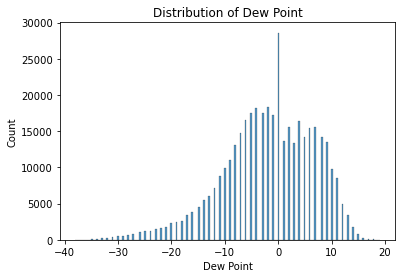

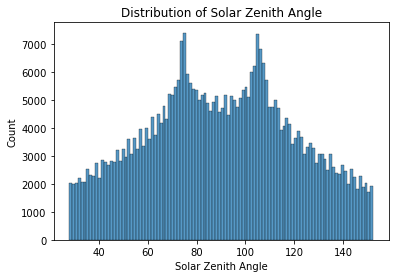

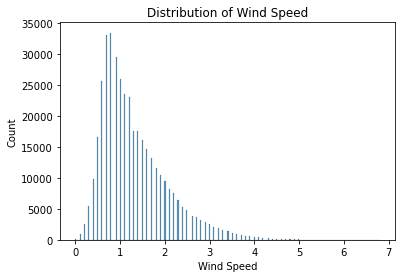

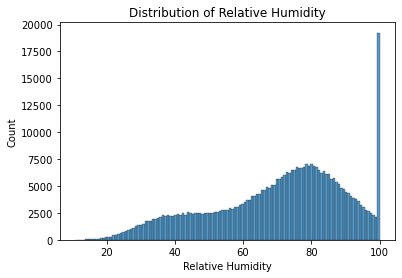

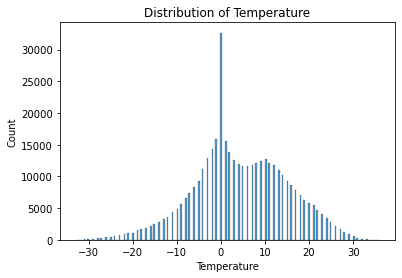

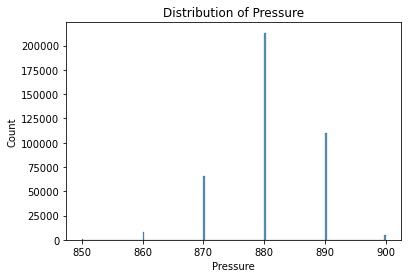

In [32]:
for col in df_predictor.drop(['GHI', 'Year', 'Month', 'time', 'Day', 'Cloud Type_tr'],  axis=1).columns:
    sns.histplot(x=col, data=df_predictor)
    
    plt.title(f'Distribution of {col}')
    plt.show()

We can see that we formated out data in a more uniform way, we will go-ahead to do some statistical analysis on the potential predictors. 

### Statistical Analysis

We will be running a Pearson Coefficient test on all the potential predicting features and our target and use p=0.05 as the threshold, in this case, In this case, we can do a  test by using a hypothesis test by using test statistics:
$$ t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}} $$

The null hypothesis for this case is that there is no population correlation between GHI and the other column we are testing. So that,
**Hypothesis Test**:

<center> $H_0: \rho = 0\;\; vs \;\;  H_1: \rho \neq 0$ </center>

where:
- r is the sample correlation
- $\rho$ is the population correlation

In [33]:
df_correlation = pd.DataFrame(index=('Correlation Coefficient', 'P Value'))
for col in df_predictor.drop(['Cloud Type_tr', 'GHI'], axis=1).columns:
    result = stats.pearsonr(df[col], df['GHI'])
    df_correlation[col] = result

In [34]:
df_correlation 

Year          Month           Day  Dew Point  \
Correlation Coefficient  0.001547  -4.647443e-02  8.262896e-03   0.224417   
P Value                  0.325996  1.720808e-191  1.560383e-07   0.000000   

                         Solar Zenith Angle  Wind Speed  Relative Humidity  \
Correlation Coefficient           -0.778172    0.094501          -0.739924   
P Value                            0.000000    0.000000           0.000000   

                         Temperature  Pressure      time  
Correlation Coefficient     0.560077  0.083802  0.073884  
P Value                     0.000000  0.000000  0.000000

In [35]:
coef_df = df_correlation.T.reset_index().sort_values(by='Correlation Coefficient', ascending=False)

We will do a quick plot to check the P values of every predictors we have.

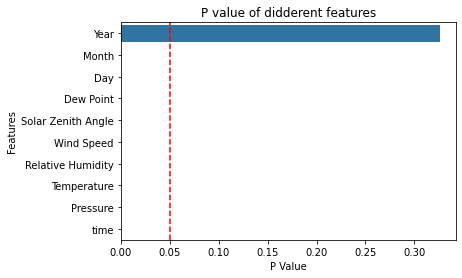

In [36]:
sns.barplot(x='P Value', y='index', data = df_correlation.T.reset_index()).set_title('P value of didderent features')
plt.ylabel('Features')
plt.axvline(0.05, color='red', linestyle='--')
plt.show()

The p-value of the test between 'Year' and 'GHI' is 0.356, which is greater than 0.05, which means we can not reject the null hypothesis and we can say that, in the population, there is no significant correlation between 'GHI' and 'Year'. Therefore, 'Year' may not be a good predictor for target 'GHI'. We will take 'Year' out of the predictor data frame. At the same time, the p-values from the test results between all the other features and the target are smaller than 0.05, for the other features, we can reject the null hypothesis and say that, in the population, there is a significant correlation between the other features and the target.

We also want to know how strong the correlation is between every predictor and GHI. 

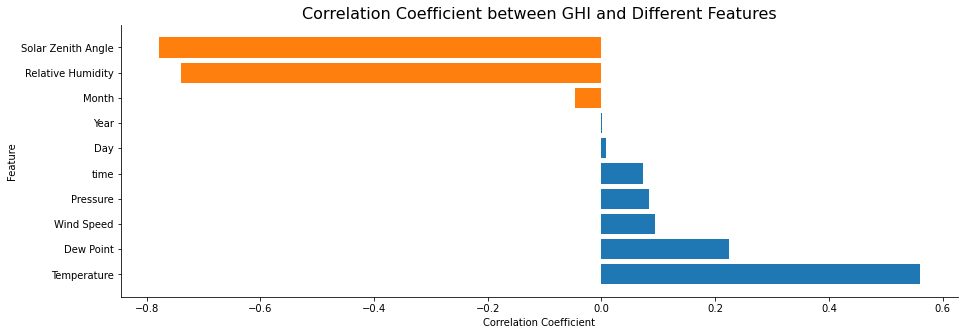

In [37]:
plt.figure(figsize=(15,5))
positive_coefs = coef_df[coef_df['Correlation Coefficient'] >=0]
negative_coefs = coef_df[coef_df['Correlation Coefficient'] < 0]
plt.barh(positive_coefs['index'], positive_coefs['Correlation Coefficient'])
plt.barh(negative_coefs['index'], negative_coefs['Correlation Coefficient'])
plt.title('Correlation Coefficient between GHI and Different Features', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
sns.despine()
plt.show()

- Strong negative correlation between solar zenith angle, relative humidity, and GHI. 
- Mid strong positive correlation between GHI and temperature.

In [ ]:
df_predictor = df_predictor.drop('Year', axis=1)

Now, let's take a look at the pair plot and heat map to check out the features are related to each other.

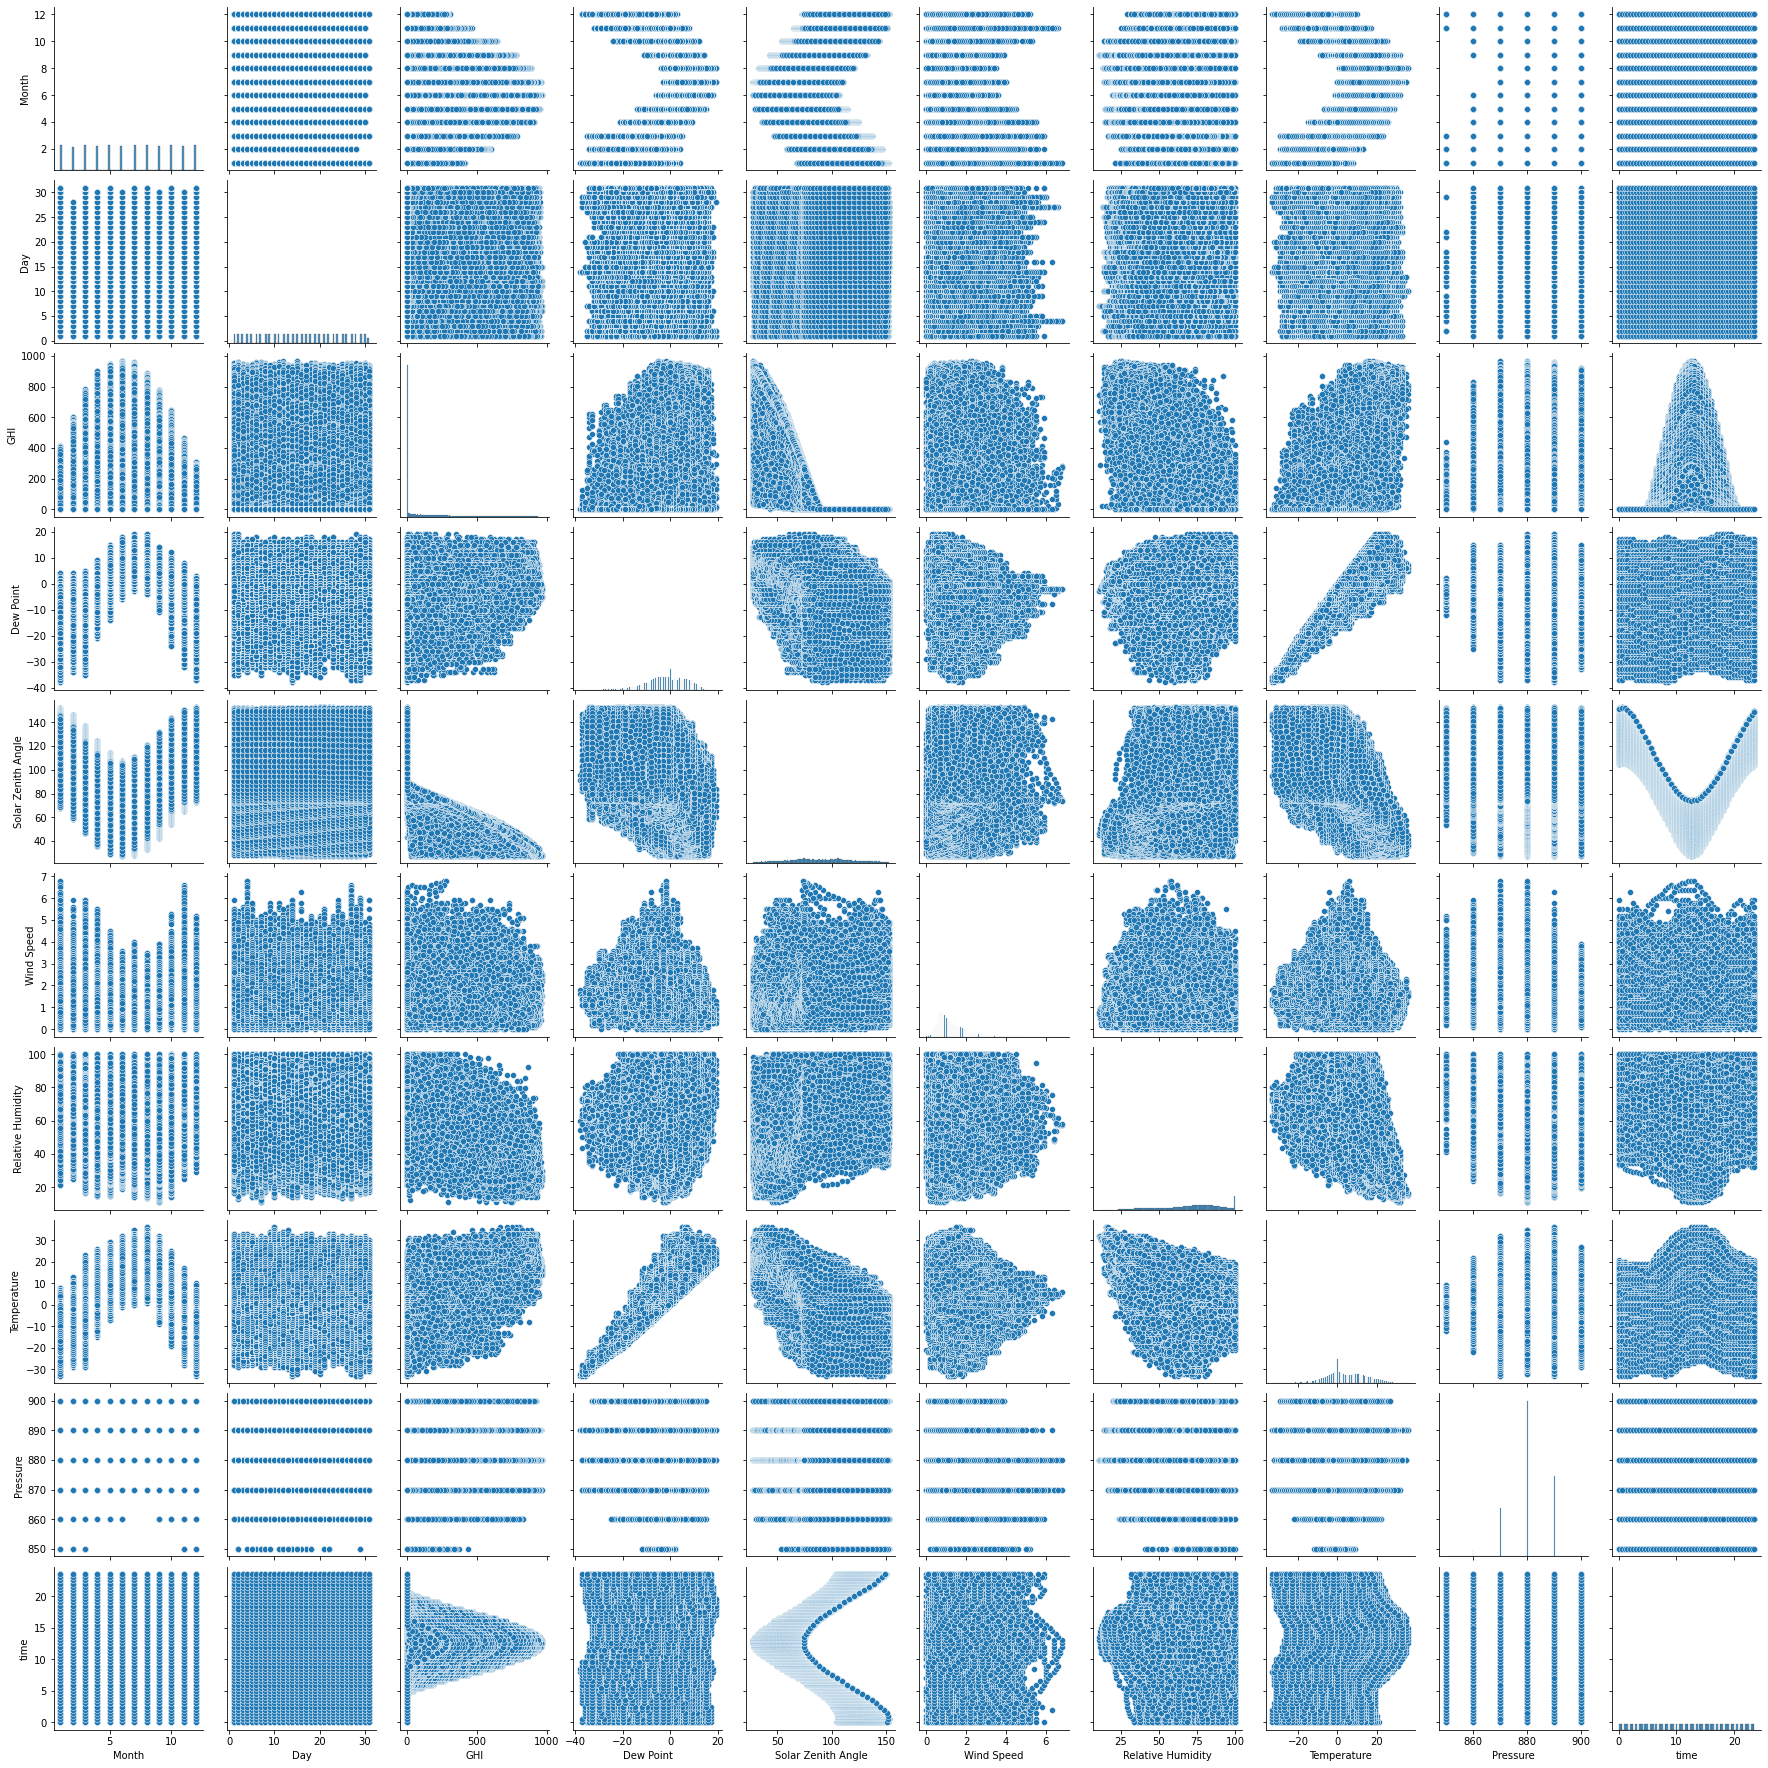

In [39]:
sns.pairplot(df_predictor.drop('Cloud Type_tr', axis=1))
plt.show()

From the pair plot above we can see a clear strong correlation between 'Dew Point' and 'Temperature'. we can all so see many "bell" shape scatter plots between 'time', 'Month', and 'GHI', which tells us if we do a transform on these 2 features it can help us to predict 'GHI'.  At the same time, the same type of "bell" shape scatter plot could be observed between 'time', 'Month' and many other features, which means if we transformed the 'time' and 'Month' features, the transformation might end up causing stronger multicollinearity. 

<AxesSubplot:>

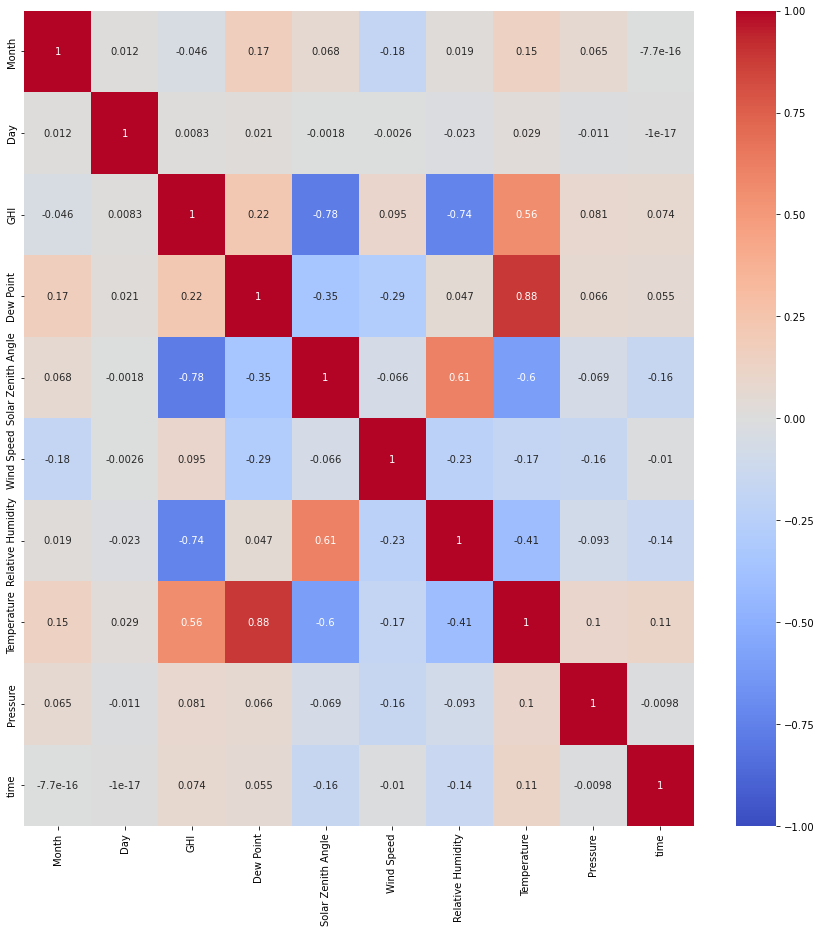

In [40]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_predictor.drop('Cloud Type_tr', axis=1).corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)

- Strong correlation between 'Dew Point' and 'Temperature'.
- Mid-strong correlation between Temperature and Relative Humidity. 
- Theere is a correlation between 'Wind Speed' and 'Relative Humidity'/'Dew Point'.

These correlations are not hard to understand as weather data could be easily affected by each other.

We will add 2 features of the transformed 'time' and 'Month' to see what we can get.

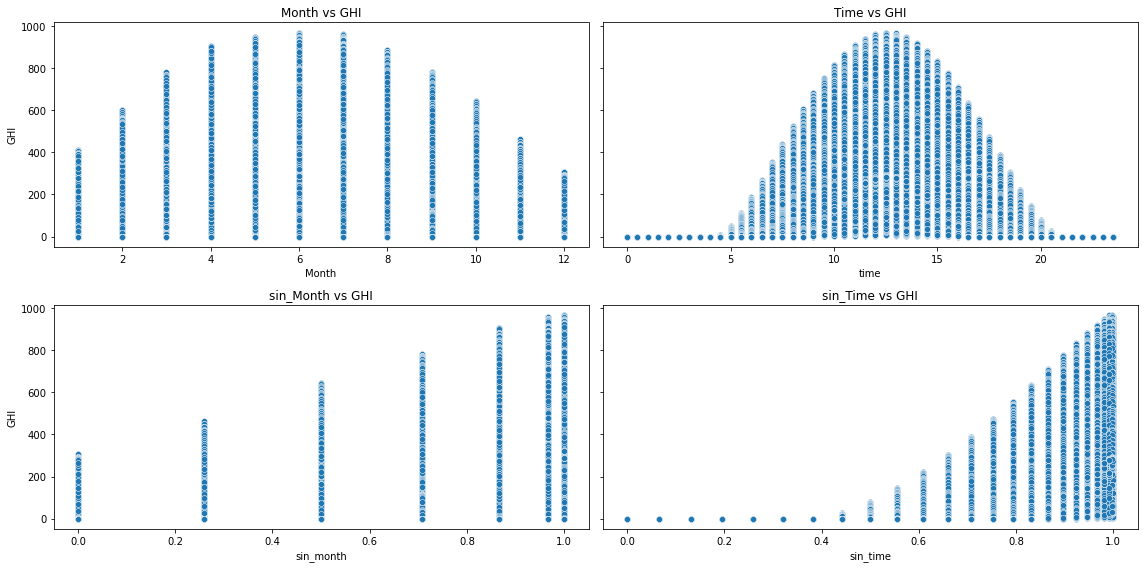

In [41]:
df_predictor['sin_month'] = np.sin(df_predictor['Month'].values*np.pi/12)
df_predictor['sin_time'] = np.sin(df_predictor['time'].values*np.pi/24)
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(16, 8))
sns.scatterplot(x='Month', y='GHI', data=df_predictor, ax=axes[0][0]).set_title('Month vs GHI')
sns.scatterplot(x='time', y='GHI', data=df_predictor, ax=axes[0][1]).set_title('Time vs GHI')

sns.scatterplot(x='sin_month', y='GHI', data=df_predictor, ax=axes[1][0]).set_title('sin_Month vs GHI')
sns.scatterplot(x='sin_time', y='GHI', data=df_predictor, ax=axes[1][1]).set_title('sin_Time vs GHI')
plt.tight_layout()
plt.show()

The since transform in time and month did change the shape of the scatter plot to a more regular shape. We will check the pair plot and heat map again to see the multicollinearity.

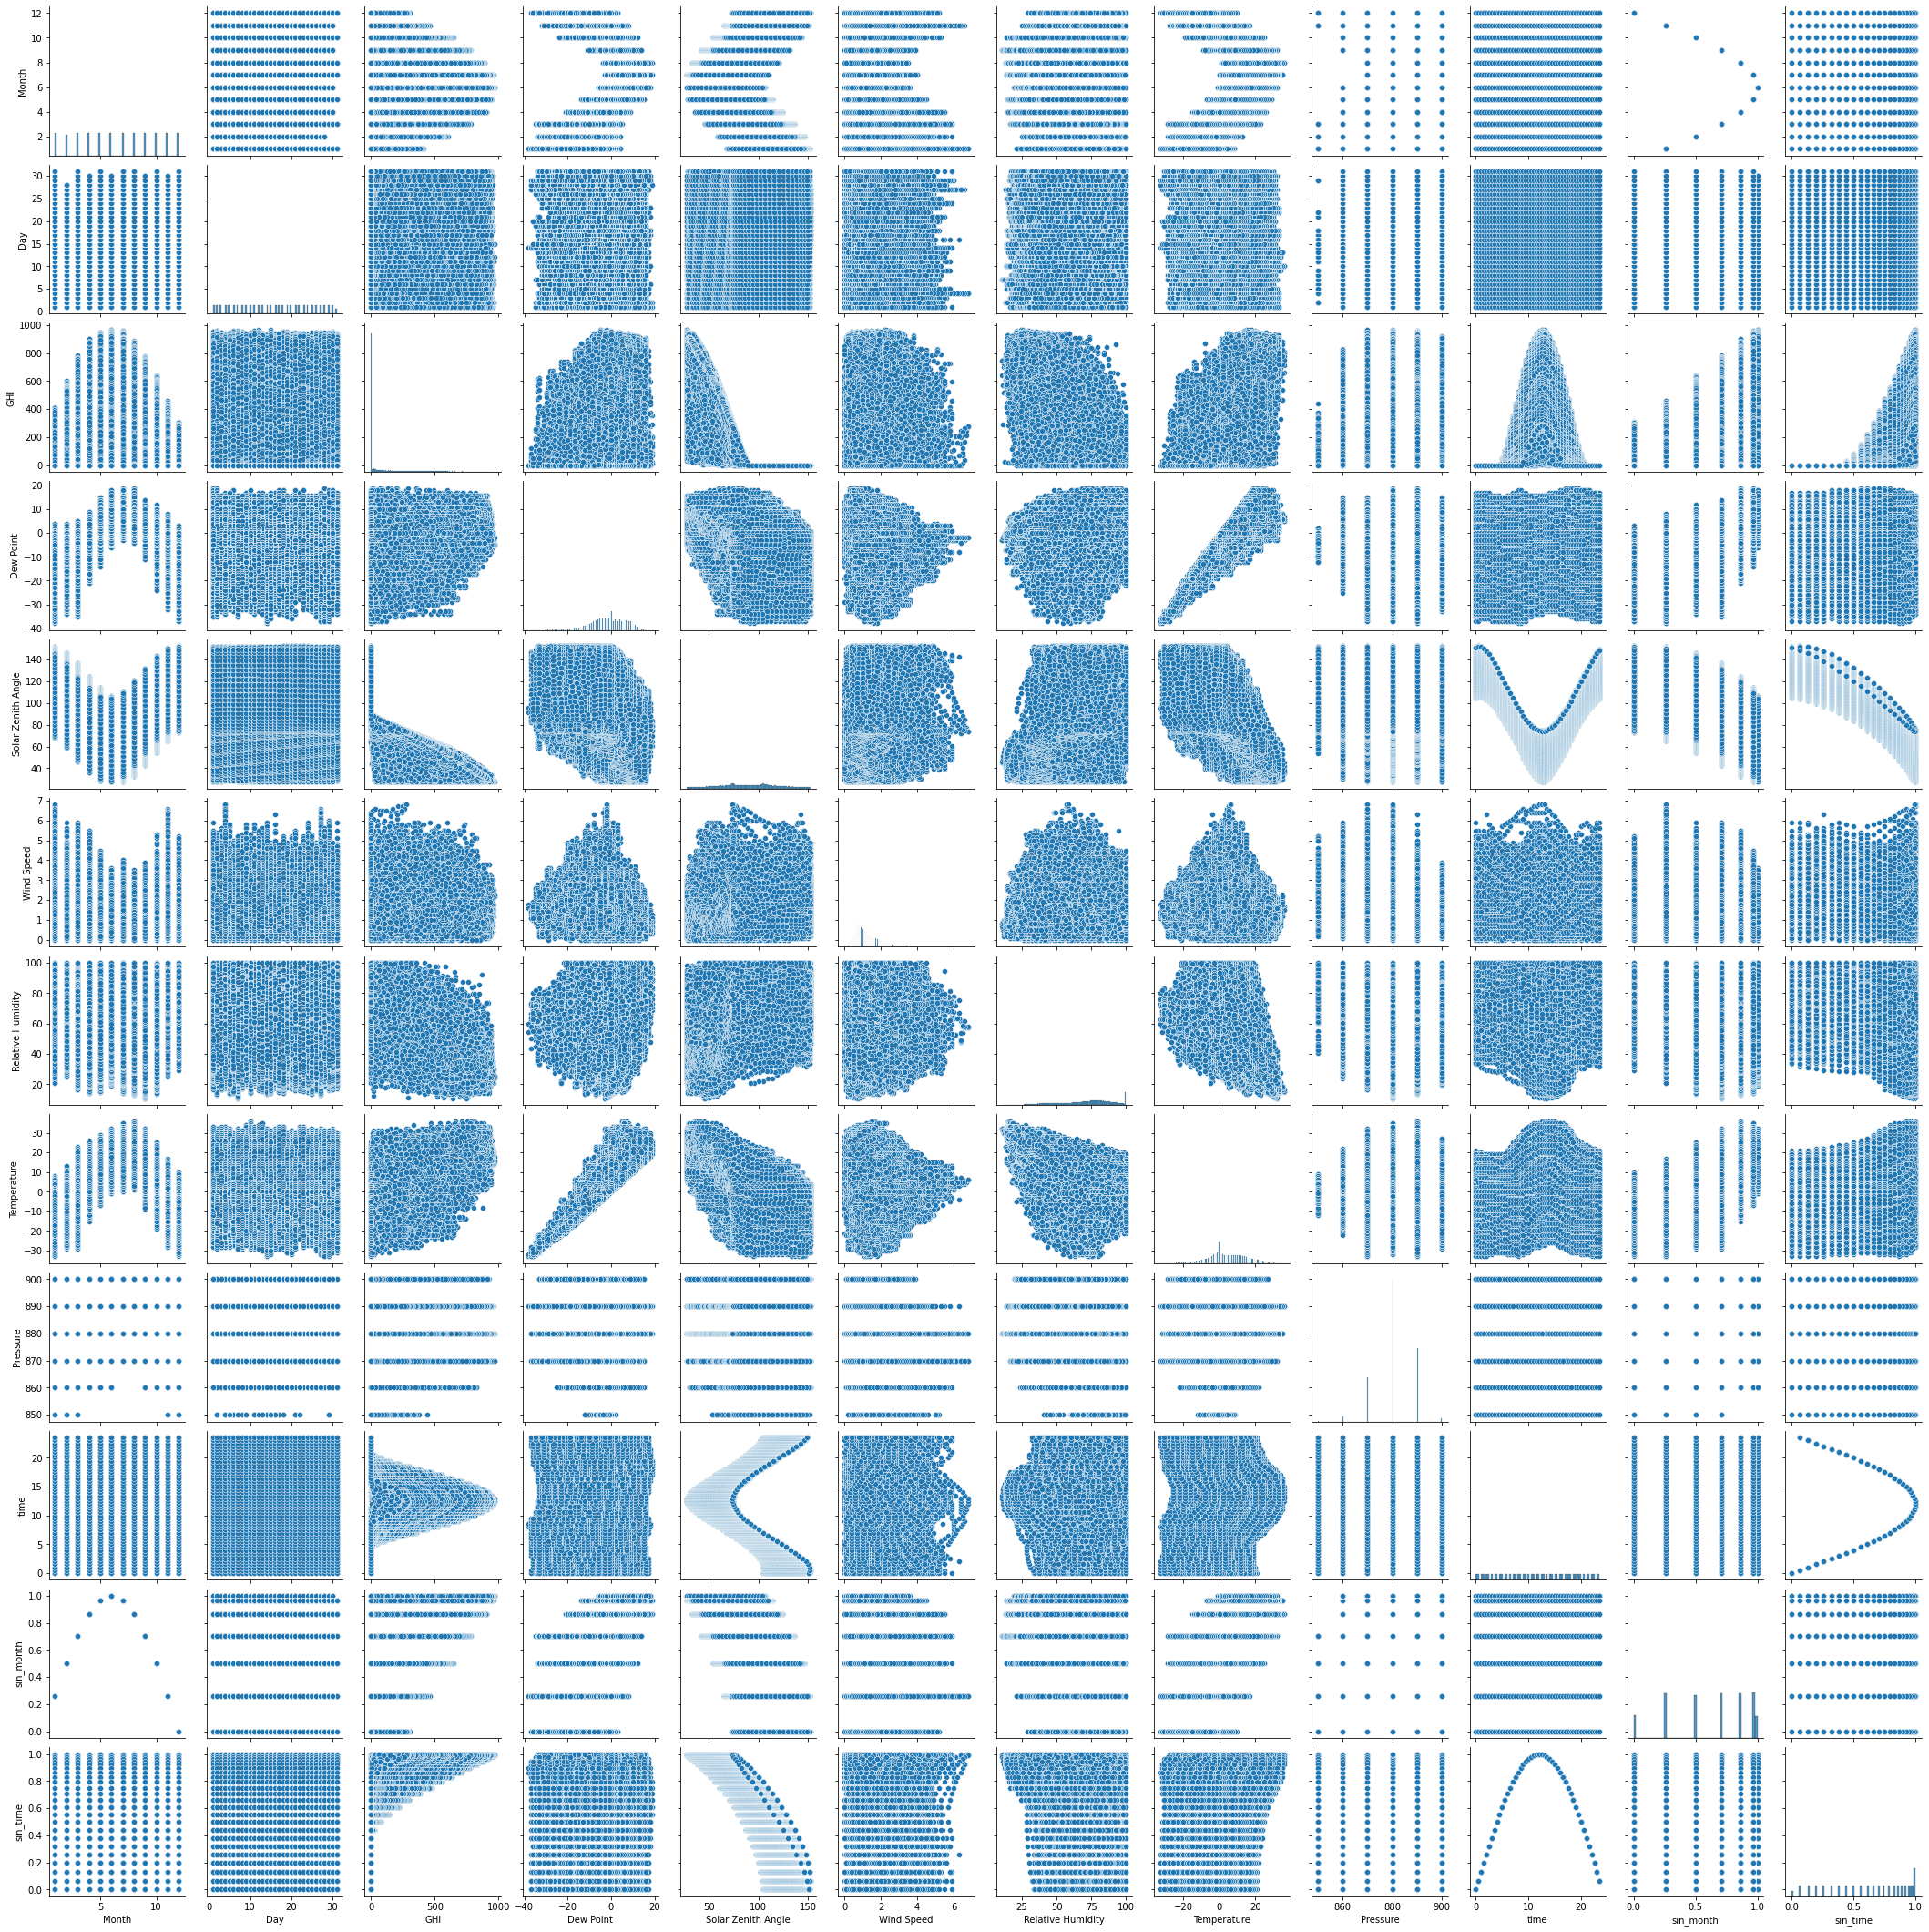

In [42]:
sns.pairplot(df_predictor.drop('Cloud Type_tr', axis=1))
plt.show()

<AxesSubplot:>

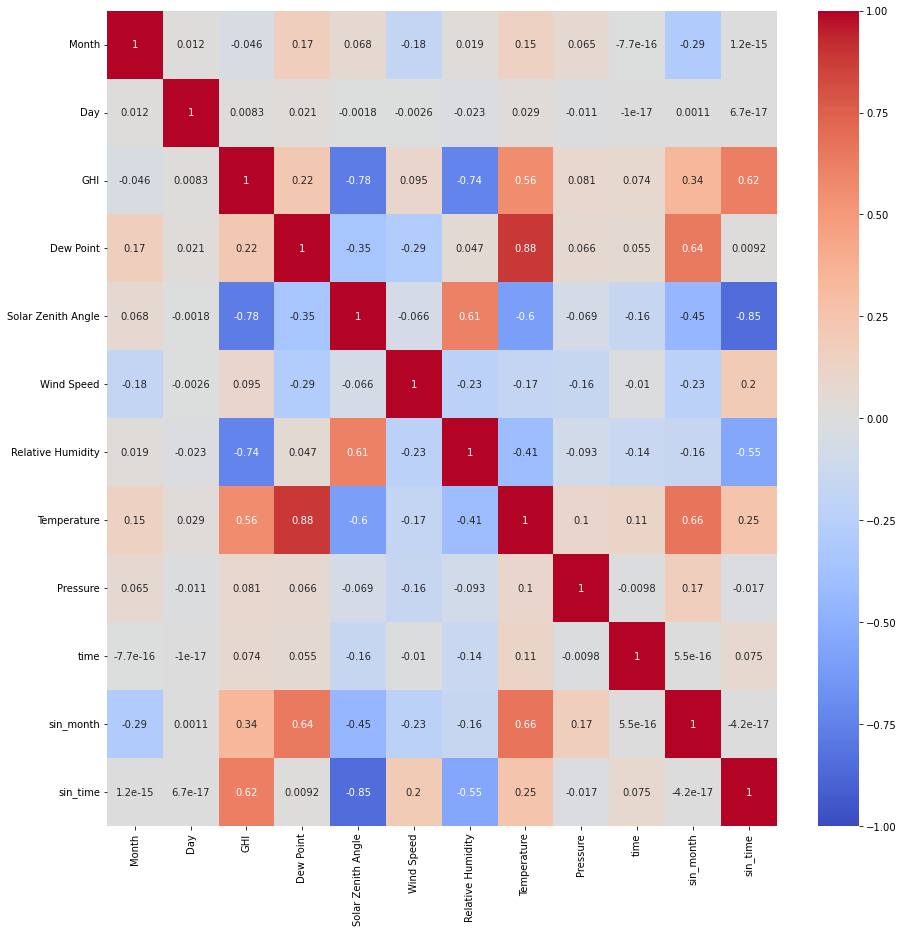

In [43]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_predictor.drop('Cloud Type_tr', axis=1).corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)

As we expected, we can see the correlation between the sine transformed month, time and GHI are a lot higher than the original one, but we also see they have a higher correlation with all the other features. We are expecting high multicollinearity in this data set and we will test it using VIF when we are doing the regression modeling

Now, let's take a look at our categorical data.

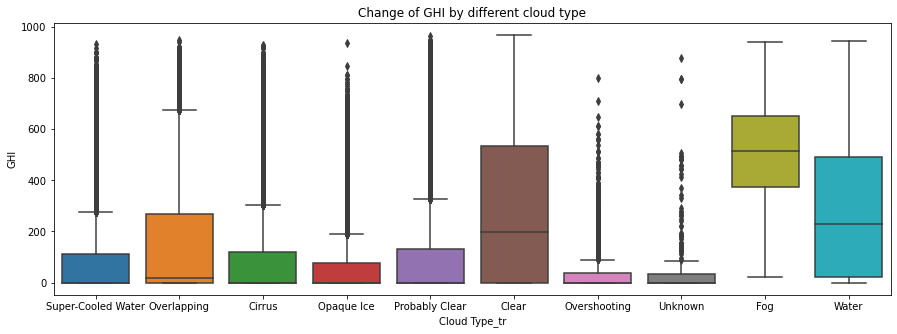

In [44]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Cloud Type_tr', y='GHI', data=df).set_title('Change of GHI by different cloud type')
plt.show()

- We only see 10 types of cloud in the dataset instead of 13, we will keep this in mind while we are building the app.
- We can see the difference in how GHI spread out with the different types of clouds.
- Second, it does look like we got higher solar irradiance when there is fog in the presence than on a clear day, this could be caused by fog normally happening during warmer times, and with the sun position and other factors combined.

In [45]:
df['Cloud Type_tr'].value_counts(normalize=True)

Cirrus                0.224797
Clear                 0.222029
Super-Cooled Water    0.171173
Overlapping           0.119101
Probably Clear        0.113902
Opaque Ice            0.107194
Water                 0.029601
Overshooting          0.008797
Fog                   0.002814
Unknown               0.000591
Name: Cloud Type_tr, dtype: float64

We can see that only a small amount of data points have water, overshooting, fog, and unknown cloud type.

Now that we have a basic idea about our data, we will be going ahead to save the modified datafram including the changes we made. We will have one Jupiter notebook for long-term energy prediction with different time series analysis techniques and we will have another Jupiter notebook for power prediction by using different regression models.

In [46]:
df['sin_time'] = df_predictor['sin_time']
df['sin_month'] = df_predictor['sin_month']
df['Pressure'] = np.around(df['Pressure']+0.1, decimals=-1)
df['Temperature'] = np.around(df['Temperature']+0.01)
df['Dew Point'] = np.around(df['Dew Point']+0.01)
df = df.drop('date', axis=1)


In [47]:
df.to_csv('modified_table.csv')

From now on, we will move forward with Final project-2 Energy prediction modeling to use time series analysis for energy estimation modeling.

## Conclusion

In this Jupiter notebook, we load our original data, transform the original data to 2 different sets of data for time series (energy prediction) and regression (power prediction) modeling. We performed EDA and statistical tests on out dataset and found the top 3 features that have the strongest correlation with our target. We did a bit of feature engineering that hopefully could help us to have a better performance model. We will be going-ahead with time series and regression modeling.

## Citation ##

[1] https://www.worldatlas.com/articles/the-sunniest-cities-in-canada.html#:~:text=Sunniest%20Canadian%20Cities-,Calgary,in%20the%20city%20are%20sunny.

[2] https://www.pveducation.org/pvcdrom/properties-of-sunlight/typical-meteorological-year-data-tmy
